#Backpropagation

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Load the datasets:

In [ ]:
# Load MNIST dataset
mnist = keras.datasets.mnist
(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = mnist.load_data()

# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images_fashion, train_labels_fashion), (test_images_fashion, test_labels_fashion) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Preprocess the data:

In [ ]:
# Normalize pixel values to between 0 and 1
train_images_mnist, test_images_mnist = train_images_mnist / 255.0, test_images_mnist / 255.0
train_images_fashion, test_images_fashion = train_images_fashion / 255.0, test_images_fashion / 255.0

Build and Train the Model


Training model on MNIST dataset...


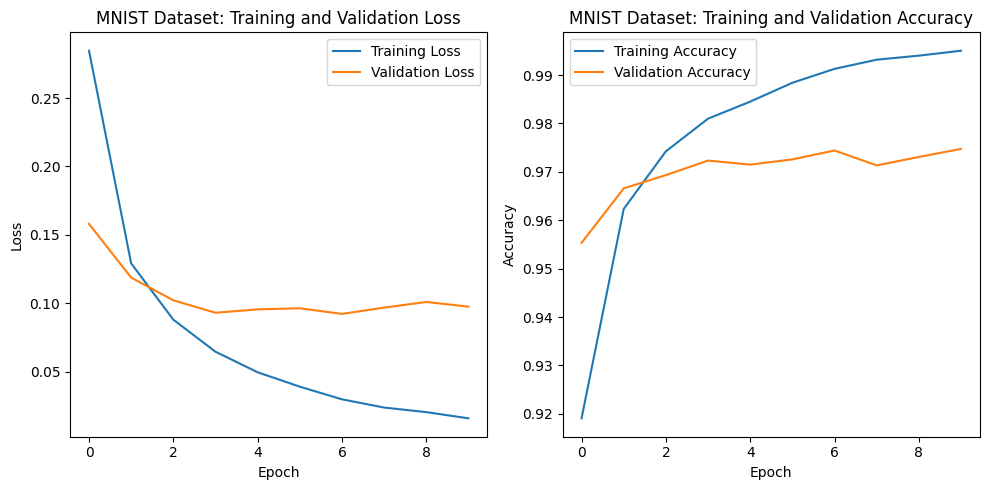

Training model on Fashion MNIST dataset...


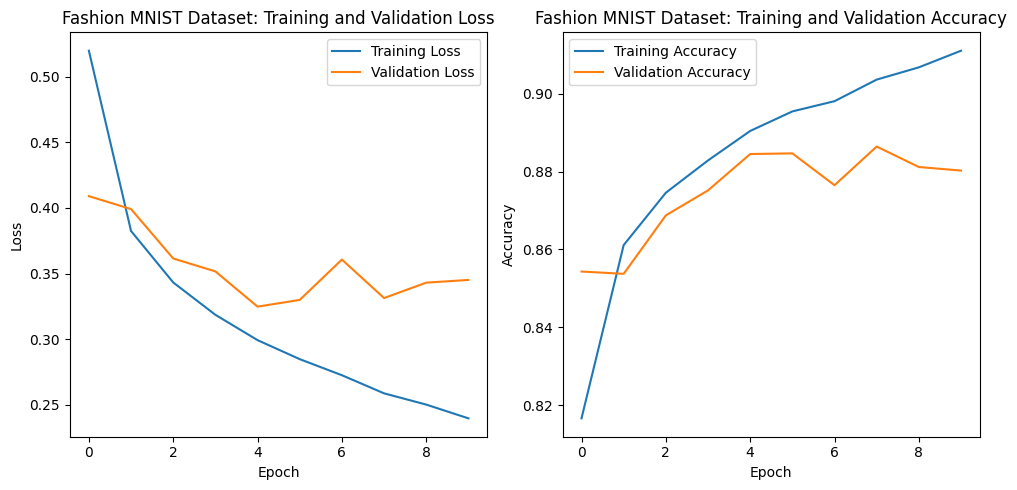

In [ ]:
def train_and_evaluate(images, labels, dataset_name):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"Training model on {dataset_name} dataset...")
    history = model.fit(images, labels, epochs=10, validation_split=0.2, verbose=0)

    # Plot training history
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{dataset_name} Dataset: Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{dataset_name} Dataset: Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model

# Train and evaluate on MNIST dataset
mnist_model = train_and_evaluate(train_images_mnist, train_labels_mnist, "MNIST")

# Train and evaluate on Fashion MNIST dataset
fashion_model = train_and_evaluate(train_images_fashion, train_labels_fashion, "Fashion MNIST")


In [ ]:
def evaluate_model(model, test_images, test_labels, dataset_name):
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    print(f"Accuracy on {dataset_name} Test Set: {test_acc}")

# Evaluate MNIST model
evaluate_model(mnist_model, test_images_mnist, test_labels_mnist, "MNIST")

# Evaluate Fashion MNIST model
evaluate_model(fashion_model, test_images_fashion, test_labels_fashion, "Fashion MNIST")

Accuracy on MNIST Test Set: 0.9781000018119812
Accuracy on Fashion MNIST Test Set: 0.8795999884605408


#Optimization Techniques

#1. Momentum Optimization

Momentum optimization is a method that helps accelerate gradient descent by adding a fraction (commonly denoted as beta or gamma) of the update vector of the past time step to the current update vector. This technique helps dampen oscillations and leads to faster convergence.

In [ ]:
# Momentum Optimization using TensorFlow/Keras with MNIST

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a simple neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Compile model with SGD optimizer using momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train.reshape(-1, 784), y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3276 - accuracy: 0.9044 - val_loss: 0.1629 - val_accuracy: 0.9547
Epoch 2/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1565 - accuracy: 0.9546 - val_loss: 0.1158 - val_accuracy: 0.9695
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1109 - accuracy: 0.9682 - val_loss: 0.0941 - val_accuracy: 0.9735
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0872 - accuracy: 0.9750 - val_loss: 0.0826 - val_accuracy: 0.9768
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0719 - accuracy: 0.9791 - val_loss: 0.0829 - val_accuracy: 0.9777
Epoch 6/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0598 - accuracy: 0.9825 - val_loss: 0.0762 - val_accuracy: 0.9792
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0512 - accuracy: 0.9858 - val_loss: 0.0716 - val_accuracy:

#2. Nesterov Accelerated Gradient (NAG)

Nesterov Accelerated Gradient (NAG) is a variant of momentum optimization that slightly modifies how the gradient is computed. It calculates the gradient not at the current parameters but at a point slightly ahead in the direction of the momentum. This helps in reducing the oscillations typically seen with standard momentum.



In [ ]:
# Nesterov Accelerated Gradient (NAG) using TensorFlow/Keras with MNIST

# Build and compile model similar to above but with NAG optimizer
optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train.reshape(-1, 784), y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0285 - accuracy: 0.9924 - val_loss: 0.0706 - val_accuracy: 0.9797
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9939 - val_loss: 0.0690 - val_accuracy: 0.9817
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0217 - accuracy: 0.9951 - val_loss: 0.0707 - val_accuracy: 0.9808
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0189 - accuracy: 0.9960 - val_loss: 0.0729 - val_accuracy: 0.9783
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0166 - accuracy: 0.9967 - val_loss: 0.0719 - val_accuracy: 0.9810
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0141 - accuracy: 0.9976 - val_loss: 0.0697 - val_accuracy: 0.9812
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0125 - accuracy: 0.9981 - val_loss: 0.0751 - val_accuracy:

#3. AdaGrad, RMSProp, and Adam Optimization Algorithms

AdaGrad, RMSProp, and Adam are advanced optimization algorithms that adapt the learning rate during training based on the average of past gradients. They are particularly useful in settings where different parameters may require different learning rates.

AdaGrad optimizer:

In [ ]:
# AdaGrad, RMSProp, and Adam optimization using TensorFlow/Keras with MNIST

# Using AdaGrad optimizer
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (choose one of the above optimizers)
model.fit(x_train.reshape(-1, 784), y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0067 - accuracy: 0.9994 - val_loss: 0.0703 - val_accuracy: 0.9808
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0063 - accuracy: 0.9996 - val_loss: 0.0716 - val_accuracy: 0.9817
Epoch 3/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0061 - accuracy: 0.9996 - val_loss: 0.0703 - val_accuracy: 0.9818
Epoch 4/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0059 - accuracy: 0.9997 - val_loss: 0.0710 - val_accuracy: 0.9810
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0057 - accuracy: 0.9997 - val_loss: 0.0717 - val_accuracy: 0.9818
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0056 - accuracy: 0.9997 - val_loss: 0.0709 - val_accuracy: 0.9813
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0054 - accuracy: 0.9997 - val_loss: 0.0714 - val_accuracy

RMSProp optimizer:

In [ ]:
# AdaGrad, RMSProp, and Adam optimization using TensorFlow/Keras with MNIST

# Using RMSProp optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (choose one of the above optimizers)
model.fit(x_train.reshape(-1, 784), y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0196 - accuracy: 0.9941 - val_loss: 0.0913 - val_accuracy: 0.9798
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.1046 - val_accuracy: 0.9768
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0956 - val_accuracy: 0.9792
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.0983 - val_accuracy: 0.9792
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.1022 - val_accuracy: 0.9790
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.1010 - val_accuracy: 0.9787
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.1095 - val_accuracy:

Adam optimizer:

In [ ]:
# AdaGrad, RMSProp, and Adam optimization using TensorFlow/Keras with MNIST

# Using Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (choose one of the above optimizers)
model.fit(x_train.reshape(-1, 784), y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.1412 - val_accuracy: 0.9763
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.1403 - val_accuracy: 0.9752
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.1333 - val_accuracy: 0.9768
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.1287 - val_accuracy: 0.9780
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.1375 - val_accuracy: 0.9777
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.1273 - val_accuracy: 0.9793
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.1576 - val_accuracy:

#4. Learning Rate Schedules and Adaptive Learning Rates

Learning rate schedules and adaptive learning rates adjust the learning rate during training based on various strategies (e.g., reducing the learning rate over time or based on performance metrics).



In [ ]:
# Learning Rate Schedules using TensorFlow/Keras with MNIST

# Define a learning rate schedule (e.g., exponential decay)
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)

# Create optimizer with the learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train.reshape(-1, 784), y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1988 - accuracy: 0.9577 - val_loss: 0.2109 - val_accuracy: 0.9615
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1530 - accuracy: 0.9631 - val_loss: 0.2045 - val_accuracy: 0.9593
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1372 - accuracy: 0.9654 - val_loss: 0.2102 - val_accuracy: 0.9590
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1256 - accuracy: 0.9687 - val_loss: 0.2120 - val_accuracy: 0.9593
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1281 - accuracy: 0.9706 - val_loss: 0.2508 - val_accuracy: 0.9597
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1182 - accuracy: 0.9719 - val_loss: 0.2083 - val_accuracy: 0.9635
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0988 - accuracy: 0.9759 - val_loss: 0.1868 - val_accuracy:

#5. Adadelta

Adadelta is an extension of AdaGrad that seeks to resolve its radically diminishing learning rates. Instead of accumulating all past squared gradients, Adadelta restricts the window of accumulated past gradients to some fixed size w.



In [ ]:
# Adadelta optimization using TensorFlow/Keras with MNIST

optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train.reshape(-1, 784), y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0400 - accuracy: 0.9895 - val_loss: 0.2027 - val_accuracy: 0.9723
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0269 - accuracy: 0.9925 - val_loss: 0.1988 - val_accuracy: 0.9738
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0224 - accuracy: 0.9939 - val_loss: 0.1966 - val_accuracy: 0.9738
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0195 - accuracy: 0.9947 - val_loss: 0.1968 - val_accuracy: 0.9750
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0179 - accuracy: 0.9952 - val_loss: 0.1944 - val_accuracy: 0.9755
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0168 - accuracy: 0.9956 - val_loss: 0.1953 - val_accuracy: 0.9750
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0158 - accuracy: 0.9959 - val_loss: 0.1952 - val_accuracy:

#6. AdaMax

AdaMax is a variant of Adam based on the infinity norm of the gradients. It is more stable than Adam in very deep models and works well with sparse gradients.



In [ ]:
# AdaMax optimization using TensorFlow/Keras with MNIST

optimizer = tf.keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train.reshape(-1, 784), y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0136 - accuracy: 0.9965 - val_loss: 0.1972 - val_accuracy: 0.9763
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0123 - accuracy: 0.9970 - val_loss: 0.1960 - val_accuracy: 0.9767
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0115 - accuracy: 0.9973 - val_loss: 0.1950 - val_accuracy: 0.9757
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0109 - accuracy: 0.9974 - val_loss: 0.1955 - val_accuracy: 0.9757
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0104 - accuracy: 0.9974 - val_loss: 0.1951 - val_accuracy: 0.9758
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0099 - accuracy: 0.9974 - val_loss: 0.1951 - val_accuracy: 0.9760
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0094 - accuracy: 0.9975 - val_loss: 0.1948 - val_accuracy:

#7. Nadam

Nadam stands for "Nesterov-accelerated Adaptive Moment Estimation." It combines Adam with Nesterov Accelerated Gradient (NAG), which tends to converge faster and more reliably compared to other optimizers.



In [ ]:
# Nadam optimization using TensorFlow/Keras with MNIST

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train.reshape(-1, 784), y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0167 - accuracy: 0.9955 - val_loss: 0.2216 - val_accuracy: 0.9752
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.2326 - val_accuracy: 0.9730
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.2311 - val_accuracy: 0.9753
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.2436 - val_accuracy: 0.9742
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.2504 - val_accuracy: 0.9743
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.2501 - val_accuracy: 0.9763
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.2484 - val_accuracy:

#8. AdamW (Adam with Weight Decay)

AdamW is a variant of the Adam optimizer that decouples weight decay from the optimization steps. This modification has been shown to improve generalization performance, particularly in tasks where weight decay plays a critical role in regularization.



In [ ]:
# AdamW optimization using TensorFlow/Keras with MNIST

optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.01)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train.reshape(-1, 784), y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.2567 - val_accuracy: 0.9768
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.2603 - val_accuracy: 0.9770
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.2520 - val_accuracy: 0.9763
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.2548 - val_accuracy: 0.9773
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.2461 - val_accuracy: 0.9770
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.2456 - val_accuracy: 0.9768
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2419 - val_accuracy:

#9. Rectified Adam (RAdam)

Rectified Adam (RAdam) is an improvement over the original Adam optimizer, which introduces a dynamic rectification mechanism to adaptively adjust the variance estimate of the gradients. RAdam has been shown to converge faster and generalize better on some tasks.

In [ ]:
%pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.8 MB/s eta 0:00:00


In [ ]:
# Rectified Adam (RAdam) optimization using TensorFlow/Keras with MNIST
import tensorflow_addons as tfa

optimizer = tfa.optimizers.RectifiedAdam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train.reshape(-1, 784), y_train, epochs=10, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Epoch 1/10
1688/1688 [==============================] - 19s 10ms/step - loss: 7.7141e-04 - accuracy: 0.9998 - val_loss: 0.2438 - val_accuracy: 0.9765
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 7.6426e-04 - accuracy: 0.9998 - val_loss: 0.2528 - val_accuracy: 0.9770
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 7.2701e-04 - accuracy: 0.9998 - val_loss: 0.2628 - val_accuracy: 0.9770
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 6.1232e-04 - accuracy: 0.9998 - val_loss: 0.2580 - val_accuracy: 0.9763
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 7.1487e-04 - accuracy: 0.9998 - val_loss: 0.2734 - val_accuracy: 0.9768
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 7.1806e-04 - accuracy: 0.9998 - val_loss: 0.2802 - val_accuracy: 0.9755
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 4.8441e-04 - accuracy: 0.9998 - va

#10. Adaptive Gradient Clipping

Adaptive gradient clipping dynamically adjusts the clipping threshold of gradients during training. This technique can help prevent exploding gradients and stabilize training in deep neural networks.



In [ ]:
# Adaptive gradient clipping using TensorFlow/Keras with MNIST

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train.reshape(-1, 784), y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 3.7308e-04 - accuracy: 0.9999 - val_loss: 0.2971 - val_accuracy: 0.9772
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.6312e-04 - accuracy: 0.9999 - val_loss: 0.2992 - val_accuracy: 0.9765
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 3.7095e-04 - accuracy: 0.9999 - val_loss: 0.3013 - val_accuracy: 0.9753
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 3.1863e-04 - accuracy: 0.9999 - val_loss: 0.2888 - val_accuracy: 0.9760
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 1.9819e-04 - accuracy: 0.9999 - val_loss: 0.2983 - val_accuracy: 0.9765
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 1.9219e-04 - accuracy: 0.9999 - val_loss: 0.3091 - val_accuracy: 0.9760
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 3.3183e-04 - accuracy: 0.9999 - val_

#11. Gradient Centralization

Gradient Centralization is a regularization technique that aims to centralize the gradient vectors during training, making the optimization process more stable and robust against noisy gradients.



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a simple neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Define optimizer (e.g., Adam) with custom gradient behavior
class CentralizedAdam(tf.keras.optimizers.Adam):
    def __init__(self, learning_rate=0.001, **kwargs):
        super(CentralizedAdam, self).__init__(learning_rate, **kwargs)

    def _resource_apply_dense(self, grad, var, apply_state=None):
        # Centralize gradients
        grad -= tf.reduce_mean(grad)
        return super(CentralizedAdam, self)._resource_apply_dense(grad, var, apply_state)

# Create an instance of the customized optimizer
optimizer = CentralizedAdam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train.reshape(-1, 784), y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2809 - accuracy: 0.9197 - val_loss: 0.1412 - val_accuracy: 0.9607
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1243 - accuracy: 0.9631 - val_loss: 0.0931 - val_accuracy: 0.9723
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0848 - accuracy: 0.9745 - val_loss: 0.0878 - val_accuracy: 0.9752
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0627 - accuracy: 0.9806 - val_loss: 0.0861 - val_accuracy: 0.9748
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0492 - accuracy: 0.9850 - val_loss: 0.0725 - val_accuracy: 0.9787
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.0734 - val_accuracy: 0.9777
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0812 - val_accuracy: